# Use Case - Titanic

### Background

The dataset contains data for 887 of the real Titanic passengers. Each row represents one person. The columns describe different attributes about the person including whether they survived (S), their age (A), their passenger-class (C), their sex (G) and the fare they paid (X). The table below shows the Data Dictionary.

### Objective
Create a python script that contains the script to answer the questions below. Please put comments on the script to show which line of codes answers which questions. Please upload the script after you finish.

### Questions 

* What is the dimension (col, row) of the data frame?
* How to know data type of each variable?
* How many passengers survived (Survived=1) and not-survived (Survived=0)?
* How to drop column ‘Name’ from the data frame?
* Add one new column called ‘family’ to represent number of family-member aboard (hint: family = sibsp + parch)
* As shown, columns ‘Age’ contains missing values. Please add new column named ‘Age_miss’ to indicate whether Age is missing or not (Age_miss = ‘YES’ for missing value and ‘NO’ for non-missing value). 
* Please fill Age missing value with means of existing Age values
* What is the maximum passenger Age who survived from the tragedy? 
* How many passengers survived from each ‘PClass’? 
* How to randomly split the data frame into 2 parts (titanic1 and titanic2) with proportion of 0.7 for tttanic1 and 0.3 for titanic2 ? 

In [19]:
import pandas as pd
import warnings

from pandas import Series, DataFrame

warnings.filterwarnings("ignore") 

In [20]:
#Mengambil data train.csv dan menjadikannya bagian dari DataFrame
data_df = pd.read_csv('titanic.csv')

#menampilkan 10 data awal yang berhasil dibaca
data_df.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


###### 1. What is the dimension (col, row) of the data frame?

In [21]:
data_df.shape

(887, 8)

###### 2.How to know data type of each variable?

In [22]:
#membaca general information dari dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


###### 3. How many passengers survived (Survived=1) and not-survived (Survived=0)?

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pylab as plt

plt.rc('figure', figsize=(10, 5))
fizsize_with_subplots = (10, 10)
bin_size = 10

In [24]:
print("Selamat:\n",data_df[data_df['Survived']==1]['Survived'].count())
print("Meninggal:\n",data_df[data_df['Survived']==0]['Survived'].count())

Selamat:
 342
Meninggal:
 545


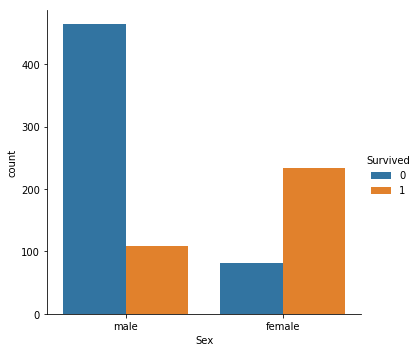

In [25]:
sns.factorplot('Sex', kind="count", hue="Survived", data=data_df)

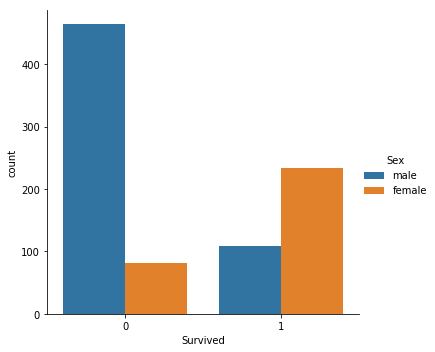

In [26]:
#kita bisa mengganti class attribut dari chart ini sesuai dengan apa yang ini kita perlihatkan, seperti berikut.
sns.factorplot('Survived', kind="count", hue="Sex", data=data_df)

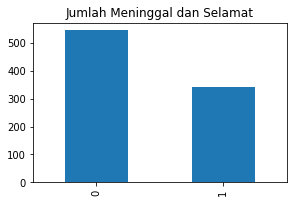

In [27]:
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)
plt.subplot2grid(fig_dims, (0, 0))
data_df['Survived'].value_counts().plot(kind='bar', 
                                         title='Jumlah Meninggal dan Selamat')

###### 4. How to drop column ‘Name’ from the data frame?

In [28]:
data_df = data_df.drop(['Name'], axis=1)

In [29]:
data_df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


###### 5. Add one new column called ‘family’ to represent number of family-member aboard (hint: family = sibsp + parch)

In [30]:
data_df['Family'] = data_df['Siblings/Spouses Aboard'] + data_df['Parents/Children Aboard']

In [31]:
data_df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0


###### 6. As shown, columns ‘Age’ contains missing values. Please add new column named ‘Age_miss’ to indicate whether Age is missing or not (Age_miss = ‘YES’ for missing value and ‘NO’ for non-missing value). 

In [32]:
data_df['Age_miss'] = data_df['Age']

data_df['Age_miss'].loc[data_df['Age_miss'] ==  0] =  'YES'
data_df['Age_miss'].loc[data_df['Age_miss'] != 0] = 'NO'
data_df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family,Age_miss
0,0,3,male,22.0,1,0,7.2500,1,NO
1,1,1,female,38.0,1,0,71.2833,1,NO
2,1,3,female,26.0,0,0,7.9250,0,NO
3,1,1,female,35.0,1,0,53.1000,1,NO
4,0,3,male,35.0,0,0,8.0500,0,NO


###### 7. Please fill Age missing value with means of existing Age values

In [33]:
data_df['Age'].fillna((data_df['Age'].mean()), inplace=True)

##### 8. What is the maximum passenger Age who survived from the tragedy? 

In [34]:
oldest = data_df['Age'].max()
oldest

80.0

###### 9. How many passengers survived from each ‘PClass’? 

In [35]:
print("Selamat: \n",data_df[data_df['Survived']==1]['Pclass'].value_counts())
print("Meninggal: \n",data_df[data_df['Survived']==0]['Pclass'].value_counts())

Selamat: 
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Meninggal: 
 3    368
2     97
1     80
Name: Pclass, dtype: int64


###### 10. How to randomly split the data frame into 2 parts (titanic1 and titanic2) with proportion of 0.7 for tttanic1 and 0.3 for titanic2 ? 

In [39]:
data_new = data_df.sample(frac=1)
titanic1, titanic2 = np.split(data_new,[int(.7*len(data_new))])

In [40]:
print(titanic1.shape)

(620, 9)


In [41]:
print(titanic2.shape)

(267, 9)
